# PARTE 4

A partir de 4 señales distintas (Voz Hombre, Voz Mujer, Suma senoidal, Chirp), se utiliza filtraje y se devuelven los gráficos en el dominio del tiempo y de la frecuencia de las señales originales y las filtradas. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile as wav
import IPython.display as ipd
import fftplot2

In [2]:
# Primero Leemos la señal de voz masculina
fs, masc = wav.read('VozHombre.wav');

# Se calcula el vector de tiempo
ts = np.size(masc)/fs;  # Duración de la señal
t = np.arange(0, ts, 1/fs); #Empieza en 0, termina en ts con pasos 1/fs

# Cálculo del espectro bilateral con el módulo fft de numpy

#f = np.fft.fftfreq(len(masc),1/fs) # Eje frecuencial
#MASC = abs(np.fft.fft(masc)) #Magnitud
#MASC = MASC / max(MASC) * max(max(masc),abs(min(masc))) #Se normaliza 

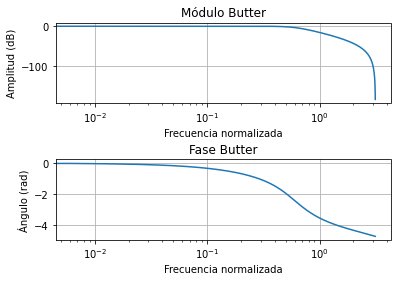

In [3]:
# Se procede a filtrar la señal. Se utilizará un filtro butter pasabajos con
# fcorte 750 Hz
fc = 750
wc = fc / (0.5 * fs) # Frecuencia de corte normalizada por fmuestreo/2
b1, a1 = signal.butter(3,wc) #Pasabajos desde wc de orden 3

f1, h1 = signal.freqz(b1,a1) # Obtención de la respuesta en frecuencia del filtro
H1 = 20 * np.log10(abs(h1))

# Obtención de la fase del filtro
Fase_butt = np.unwrap(np.angle(h1)) # Se utiliza unwrap para evitar saltos de fase
                                    # mayores a 2 * pi

fig, (ax1, ax2) = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.7) #Formato de los graficos
ax1.semilogx(f1, H1)
ax1.set_title('Módulo Butter'), ax1.set_xlabel('Frecuencia normalizada'); ax1.set_ylabel('Amplitud (dB)')
ax1.grid()
ax2.semilogx(f1,Fase_butt)
ax2.set_title('Fase Butter'), ax2.set_xlabel('Frecuencia normalizada'), ax2.set_ylabel('Ángulo (rad)')
ax2.grid()
plt.show()

In [4]:
# Para obtener la respuesta al impulso del filtro debe diseñarse una función.
# Consiste en filtrar un impulso, o sea, un array del tipo [1 0 0 0 ...] dado que
# h(t) convo delta(t) = h(t)
# Fuente: http://pyageng.mpastell.com/book/dsp.html

def plot_impz(b, a = 1, l=100):
    if type(a)== int: #FIR
        l = len(b)
    #else: # IIR
        #l = 500
    impulse = np.repeat(0.,l); impulse[0] =1.
    x = np.arange(0,l)
    response = signal.lfilter(b, a, impulse)
    plt.plot(x, response); plt.grid()
    plt.ylabel('Amplitud')
    plt.xlabel('n (muestras)')
    plt.title('Respuesta al Impulso')

# Otra manera es creando una función que devuelva t en muestras y h:
def impz (b,a,N=100):
    t = np.arange(N) 
    imp = signal.unit_impulse(N) # Señal impulsiva (vector con x[0] = 1 y (N-1)ceros)
    h = signal.lfilter(b,a,imp) 
    return t, h

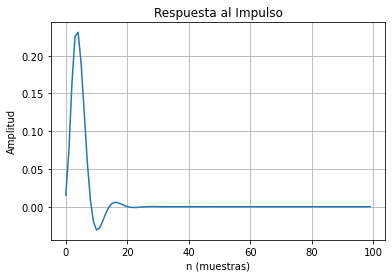

In [5]:
plot_impz(b1,a1) # Respuesta impulsiva del filtro Butter

In [6]:
# Descomentar para utilizar la funcion impz (el resultado es idéntico)

#t1, h1 = impz(b1,a1)

#plt.figure; plt.plot(t1,h1)
#plt.xlabel('t (muestras)'); plt.ylabel('Amplitud'); plt.title('Rta. al impulso')
#plt.grid(); plt.show()

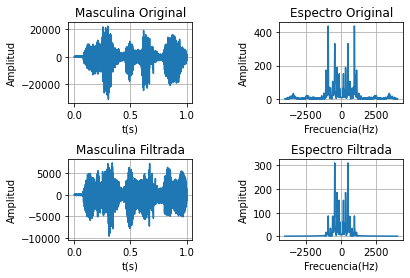

In [7]:
# Se filtra la señal
masc_filt = signal.filtfilt(b1,a1,masc)

# Descomentar para guardar la señal en un archivo wav
# masc_filt = masc_filt.astype(np.int16)
# wav.write('VozHombre_filt.wav',fs,masc_filt)

# Se calcula la transformada de la señal filtrada
#ffilt = np.fft.rfftfreq(len(masc_filt), 1/fs) #Respuesta en f de masc filtrada
#MASC_filt = abs(np.fft.rfft(masc_filt)) 
#MASC_filt = MASC_filt / max(MASC_filt) * max(max(masc_filt),abs(min(masc_filt))) #Se normaliza

# Se visualiza la señal original y la filtrada en tiempo y frecuencia:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2) ; plt.subplots_adjust(hspace=0.7, wspace=0.7)

ax1.plot(t,masc)
ax1.set_xlabel('t(s)'), ax1.set_ylabel('Amplitud'), ax1.set_title('Masculina Original')
ax1.grid()

fftplot2.graficar_fft(masc, fs, ax2,N=1024,title='Espectro Original')
ax2.set_xlabel('Frecuencia(Hz)'), ax2.set_ylabel('Amplitud')
ax2.grid()

ax3.plot(t,masc_filt)
ax3.set_xlabel('t(s)'), ax3.set_ylabel('Amplitud'), ax3.set_title('Masculina Filtrada'); ax3.grid()

fftplot2.graficar_fft(masc_filt, fs, ax4,N=1024,title='Espectro Filtrada')
ax4.set_xlabel('Frecuencia(Hz)'), ax4.set_ylabel('Amplitud'), ax4.grid()
plt.show()

In [8]:
# Reproducir la señal original
ipd.Audio(masc, rate=fs)

In [9]:
# Reproducir la señal filtrada
ipd.Audio(masc_filt, rate=fs)

In [10]:
# Se realiza el mismo procedimiento con la señal de voz femenina
fs, fem = wav.read('VozMujer.wav')
ts = np.size(fem) / fs
t = np.linspace(0, ts, np.size(fem))

# Obtencion de la transformada de fourier de la señal con el módulo fft de numpy
#f = np.fft.rfftfreq(len(fem), 1/fs);
#FEM = abs(np.fft.rfft(fem));
#FEM = FEM / max(FEM) * max(max(fem),abs(min(fem)));

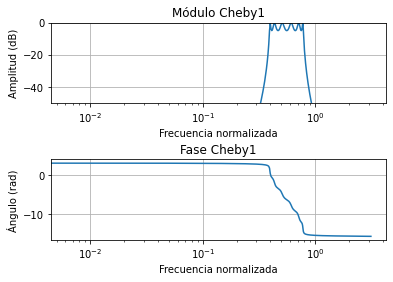

In [11]:
# Se crea un filtro Cheby1 pasabanda
fl = 500
fh = 1000
wn = [fl / (0.5 * fs), fh / (0.5 * fs)] #Se normalizan 

b2, a2 = signal.cheby1(6, 5, wn, 'pass') # Se obtienen los coeficientes de transferencia

f2, h2 = signal.freqz(b2,a2)
H2 = 20 * np.log10(abs(h2))
Fase_cheby1 = np.unwrap(np.angle(h2))

fig, (ax1, ax2) = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.7) #Formato de los graficos
ax1.semilogx(f2, H2), ax1.set_ylim((-50,0))
ax1.set_title('Módulo Cheby1'), ax1.set_xlabel('Frecuencia normalizada'); ax1.set_ylabel('Amplitud (dB)')
ax1.grid()
ax2.semilogx(f2,Fase_cheby1)
ax2.set_title('Fase Cheby1'), ax2.set_xlabel('Frecuencia normalizada'), ax2.set_ylabel('Ángulo (rad)')
ax2.grid()
plt.show()

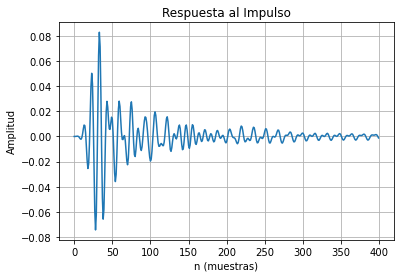

In [12]:
# Se obtiene la respuesta impulsiva del filtro
plot_impz(b2,a2,l=400)

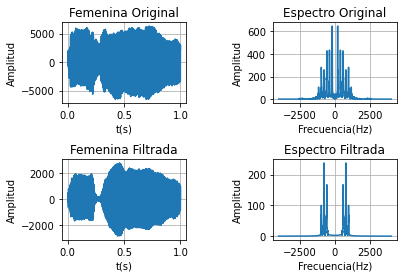

In [13]:
# Se filtra la señal de voz femenina:
fem_filt = signal.filtfilt(b2,a2,fem)

# Descomentar para guardar la señal en un archivo wav
#fem_filt = fem_filt.astype(np.int16)
#wav.write('VozMujer_filt.wav',fs,fem_filt)

# Se calcula la transformada de la señal filtrada con el módulo fft de numpy
#ffilt = np.fft.rfftfreq(len(fem_filt), 1/fs);
#FEM_filt = abs(np.fft.rfft(fem_filt));
#FEM_filt = FEM_filt / max(FEM_filt) * max(max(fem_filt),abs(min(fem_filt)));

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2) ; plt.subplots_adjust(hspace=0.7, wspace=0.7)

ax1.plot(t,fem)
ax1.set_xlabel('t(s)'), ax1.set_ylabel('Amplitud'), ax1.set_title('Femenina Original')
ax1.grid()

fftplot2.graficar_fft(fem, fs, ax2,N=1024,title='Espectro Original')
ax2.set_xlabel('Frecuencia(Hz)'), ax2.set_ylabel('Amplitud')
ax2.grid()

ax3.plot(t,fem_filt)
ax3.set_xlabel('t(s)'), ax3.set_ylabel('Amplitud'), ax3.set_title('Femenina Filtrada'); ax3.grid()

fftplot2.graficar_fft(fem_filt, fs, ax4,N=1024,title='Espectro Filtrada')
ax4.set_xlabel('Frecuencia(Hz)'), ax4.set_ylabel('Amplitud'), ax4.grid()
plt.show()

In [14]:
# Reproducir la señal original
ipd.Audio(fem, rate=fs)

In [15]:
# Reproducir la señal filtrada
ipd.Audio(fem_filt, rate=fs)

In [16]:
# Se crea un chirp para ser procesado y filtrado
fs = 8000; ti = 0; ts = 2
t = np.arange(ti, ts + 1/fs, 1/fs)
chirp = signal.chirp(t, 5, ts, 1000) 

# Se obtiene la transformada de Fourier de la señal
f = np.fft.rfftfreq(len(chirp), 1/fs);
CHIRP = abs(np.fft.rfft(chirp));
CHIRP = CHIRP / max(CHIRP) * max(max(chirp),abs(min(chirp)));

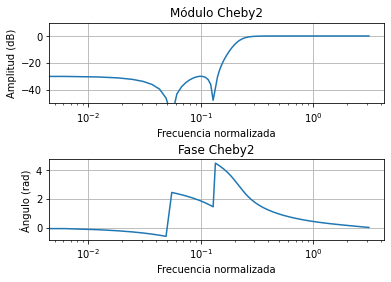

In [17]:
# Se crea un filtro Cheby2 pasaaltos
fc = 180
wn = fc / (0.5 * fs)
b3, a3 = signal.cheby2(4,30,wn,'high')

f3, h3 = signal.freqz(b3,a3)
H3 = 20 * np.log10(abs(h3))

Fase_cheby2 = np.unwrap(np.angle(h3))

fig, (ax1, ax2) = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.7) #Formato de los graficos
ax1.semilogx(f3, H3), ax1.set_ylim((-50,10))
ax1.set_title('Módulo Cheby2'), ax1.set_xlabel('Frecuencia normalizada'); ax1.set_ylabel('Amplitud (dB)')
ax1.grid()
ax2.semilogx(f3,Fase_cheby2)
ax2.set_title('Fase Cheby2'), ax2.set_xlabel('Frecuencia normalizada'), ax2.set_ylabel('Ángulo (rad)')
ax2.grid()
plt.show()

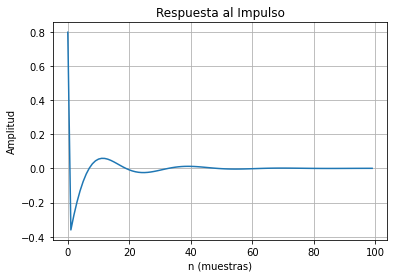

In [18]:
plot_impz(b3,a3)

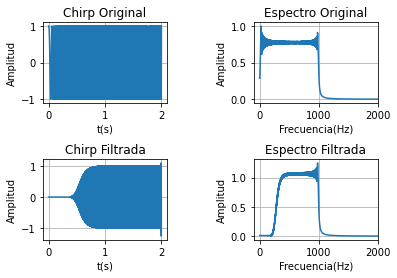

In [19]:
# Se filtra la señal
chirp_filt = signal.filtfilt(b3,a3, chirp)

# Descomentar para guardar la señal en un archivo wav
#chirp_filt = chirp_filt.astype(np.int16)
#wav.write('chirp_filt.wav',fs,chirp_filt)

# Se calcula la transformada de la señal filtrada
CHIRP_filt = abs(np.fft.rfft(chirp_filt))
CHIRP_filt = CHIRP_filt / max(CHIRP_filt) * max(max(chirp_filt),abs(min(chirp_filt)))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.7, wspace=0.7)

ax1.plot(t,chirp)
ax1.set_xlabel('t(s)'), ax1.set_ylabel('Amplitud'), ax1.set_title('Chirp Original')
ax1.grid()

ax2.plot(f,CHIRP)
ax2.set_xlabel('Frecuencia(Hz)'), ax2.set_ylabel('Amplitud'), ax2.set_title('Espectro Original')
ax2.grid(), ax2.set_xlim((-100,2000))

ax3.plot(t,chirp_filt)
ax3.set_xlabel('t(s)'), ax3.set_ylabel('Amplitud'), ax3.set_title('Chirp Filtrada'); ax3.grid()

ax4.plot(f,CHIRP_filt)
ax4.set_xlabel('Frecuencia(Hz)'), ax4.set_ylabel('Amplitud'), ax4.set_title('Espectro Filtrada')
ax4.grid(), ax4.set_xlim((-100,2000))
plt.show()

In [20]:
# Reproducir la señal original
ipd.Audio(chirp, rate=fs)

In [21]:
# Reproducir la señal filtrada
ipd.Audio(chirp_filt, rate=fs)

In [22]:
# Se genera una suma de 5 sinusoides
f1 = fs / 200 # Se define la fundamental. ya que fs = 8000, f1 = 40 Hz
x1 = np.sin(2 * np.pi * f1 * t)
x2 = np.sin(2 * np.pi * 2 * f1 * t)
x3 = np.sin(2 * np.pi * 3 * f1 * t)
x4 = np.sin(2 * np.pi * 4 * f1 * t)
x5 = np.sin(2 * np.pi * 5 * f1 * t)
x = x1 + x2 + x3 + x4 + x5

# Se obtiene su transformada
f = np.fft.fftfreq(len(x), 1/fs);
X = abs(np.fft.fft(x));
X = X / max(X) * max(max(x),abs(min(x)));

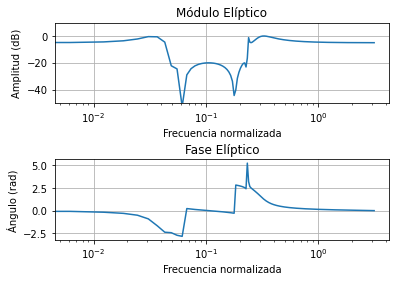

In [23]:
# Se crea un filtro elíptico rechazabanda para rescatar la fundamental
fl = 60
fh = 300
wn = [fl / (0.5 * fs), fh / (0.5 * fs)]

b4, a4 = signal.ellip(4,5,20,wn,'stop') # Coeficientes de transferencia

f4, h4 = signal.freqz(b4,a4)
H4 = 20 * np.log10(abs(h4))

Fase_ellip = np.unwrap(np.angle(h4))

fig, (ax1, ax2) = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.7)
ax1.semilogx(f4, H4), ax1.set_ylim((-50,10))
ax1.set_title('Módulo Elíptico'), ax1.set_xlabel('Frecuencia normalizada'); ax1.set_ylabel('Amplitud (dB)')
ax1.grid()
ax2.semilogx(f4,Fase_ellip)
ax2.set_title('Fase Elíptico'), ax2.set_xlabel('Frecuencia normalizada'), ax2.set_ylabel('Ángulo (rad)')
ax2.grid()
plt.show()


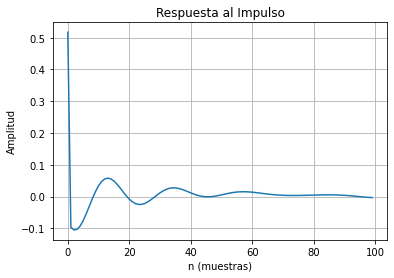

In [24]:
plot_impz(b4,a4)

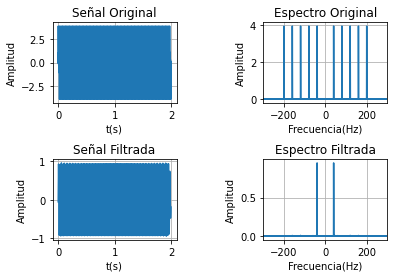

In [25]:
# Se filtra la suma senoidal para recuperar la fundamental
x_filt = signal.filtfilt(b4,a4,x)

# Descomentar para guardar la señal en un archivo wav
#x_filt = x_filt.astype(np.int16)
#wav.write('x_filt.wav',fs,x_filt)

# Se calcula la transformada de la señal filtrada
X_filt = abs(np.fft.fft(x_filt))
X_filt = X_filt / max(X_filt) * max(max(x_filt),abs(min(x_filt)))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.7, wspace=0.7)

ax1.plot(t,x)
ax1.set_xlabel('t(s)'), ax1.set_ylabel('Amplitud'), ax1.set_title('Señal Original')
ax1.grid()

ax2.plot(f,X)
ax2.set_xlabel('Frecuencia(Hz)'), ax2.set_ylabel('Amplitud'), ax2.set_title('Espectro Original')
ax2.grid(), ax2.set_xlim((-300,300))

ax3.plot(t,x_filt)
ax3.set_xlabel('t(s)'), ax3.set_ylabel('Amplitud'), ax3.set_title('Señal Filtrada'); ax3.grid()

ax4.plot(f,X_filt)
ax4.set_xlabel('Frecuencia(Hz)'), ax4.set_ylabel('Amplitud'), ax4.set_title('Espectro Filtrada')
ax4.grid(), ax4.set_xlim((-300,300))
plt.show()

In [26]:
# Reproducir la señal original
ipd.Audio(x, rate=fs)

In [27]:
# Reproducir la señal filtrada
ipd.Audio(x_filt, rate=fs) # Puede que no se aprecie por tratarse de f = 40 Hz